In [1]:
import numpy as np
import mip as mp
import matplotlib.pyplot as plt

In [2]:
m = mp.Model()

A = m.add_var(name='Produto A', var_type=mp.CONTINUOUS, lb=0)
B = m.add_var(name='Produto B', var_type=mp.CONTINUOUS, lb=0)

m.objective = mp.maximize(8 * A + 10 * B)

m += A * 0.5 + B * 0.5 <= 150
m += A * 0.6 + B * 0.4 <= 145
m += A >= 30
m += A <= 150
m += B >= 40
m += B <= 200

m.optimize()

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming problem using Primal Simplex

Coin0506I Presolve 2 (-4) rows, 2 (0) columns and 4 (-4) elements
Clp1000I sum of infeasibilities 4.95447e-05 - average 2.47723e-05, 1 fixed columns
Coin0506I Presolve 0 (-2) rows, 0 (-2) columns and 0 (-4) elements
Clp0000I Optimal - objective value 2800
Clp0000I Optimal - objective value 2800
Coin0511I After Postsolve, objective 2800, infeasibilities - dual 0 (0), primal 0 (0)
Clp0000I Optimal - objective value 2800
Clp0000I Optimal - objective value 2800
Clp0000I Optimal - objective value 2800
Coin0511I After Postsolve, objective 2800, infeasibilities - dual 0 (0), primal 0 (0)
Clp0032I Optimal objective 2800 - 0 iterations time 0.002, Presolve 0.00, Idiot 0.00


<OptimizationStatus.OPTIMAL: 0>

In [4]:
print(f"Produção de A: {A.x:.4f}")
print(f"Produção de B: {B.x:.4f}")
print(f"Max return: {m.objective_value}")

Produção de A: 100.0000
Produção de B: 200.0000
Max return: 2800.0


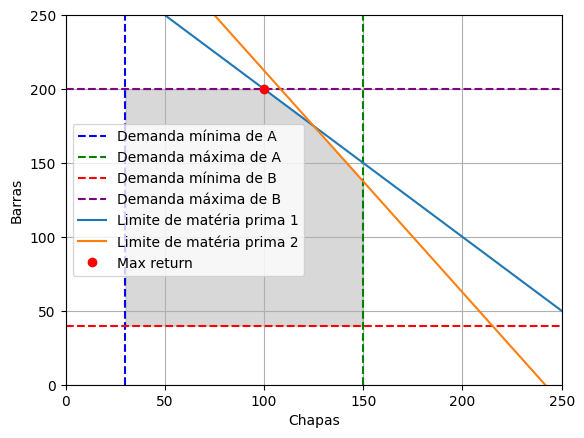

In [93]:
x = np.linspace(0, 250, 250)

r1 = 30
plt.axvline(x=r1, color='blue', linestyle='--', label="Demanda mínima de A")

r2 = 150
plt.axvline(x=r2, color='green', linestyle='--', label="Demanda máxima de A")

r3 = 40
plt.axhline(y=r3, color='red', linestyle='--', label="Demanda mínima de B")

r4 = 200
plt.axhline(y=r4, color='purple', linestyle='--', label="Demanda máxima de B")

r5 = (150 - 0.5 * x) / 0.5
plt.plot(x, r5, label="Limite de matéria prima 1")

r6 = (145 - 0.6 * x) / 0.4
plt.plot(x, r6, label="Limite de matéria prima 2")

plt.xlim(0, 250)
plt.ylim(0, 250)

plt.xlabel("Chapas")
plt.ylabel("Barras")
plt.plot(A.x, B.x, 'ro', label="Max return")
plt.fill_between(x, np.minimum(np.minimum(r5, r6), r4), r3, where=(x >= r1) & (x <= r2), color="gray", alpha=0.3)

plt.grid()
plt.legend()
plt.show()